In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Importing All Libraries**

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, StackingClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#**Data Loading**

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/all-with_feature_extraction.csv')
dataframe.head()

,ax,ay,az,gx,gy,gz,avg-ax,avg-ay,avg-az,avg-gx,...,max-gx,max-gy,max-gz,var-ax,var-ay,var-az,var-gx,var-gy,var-gz,label
0,272,13524,7848,-679,-183,-61,147.2,13523.2,8056.0,-601.4,...,-500,-106,-14,5986.56,3157.76,20883.20,3789.04,611.76,384.24,0
1,408,13384,7884,-707,-178,-38,219.2,13486.4,8021.6,-642.8,...,-569,-133,-14,12437.76,5277.44,25616.64,2248.96,467.76,324.96,0
2,404,13380,7864,-748,-168,-57,280.8,13467.2,7934.4,-678.6,...,-627,-133,-14,12437.76,7151.36,7479.04,2091.44,426.00,277.36,0
3,412,13292,7816,-714,-146,-19,325.6,13405.6,7894.4,-696.0,...,-632,-133,-14,12151.04,5968.64,7351.04,1506.80,365.84,365.36,0
4,292,13368,7892,-752,-129,-27,357.6,13389.6,7860.8,-720.0,...,-679,-129,-19,3856.64,5635.84,738.56,738.80,414.16,268.64,0


In [ ]:
dataframe.shape

(599999, 43)

#**Data Cleaning**

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599999 entries, 0 to 599998
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ax      599999 non-null  int64  
 1   ay      599999 non-null  int64  
 2   az      599999 non-null  int64  
 3   gx      599999 non-null  int64  
 4   gy      599999 non-null  int64  
 5   gz      599999 non-null  int64  
 6   avg-ax  599999 non-null  float64
 7   avg-ay  599999 non-null  float64
 8   avg-az  599999 non-null  float64
 9   avg-gx  599999 non-null  float64
 10  avg-gy  599999 non-null  float64
 11  avg-gz  599999 non-null  float64
 12  med-ax  599999 non-null  int64  
 13  med-ay  599999 non-null  int64  
 14  med-az  599999 non-null  int64  
 15  med-gx  599999 non-null  int64  
 16  med-gy  599999 non-null  int64  
 17  med-gz  599999 non-null  int64  
 18  std-ax  599999 non-null  float64
 19  std-ay  599999 non-null  float64
 20  std-az  599999 non-null  float64
 21  std-gx  59

In [ ]:
dataframe.isna().sum()

,0
ax,0
ay,0
az,0
gx,0
gy,0
gz,0
avg-ax,0
avg-ay,0
avg-az,0
avg-gx,0


In [ ]:
dataframe.describe()

,ax,ay,az,gx,gy,gz,avg-ax,avg-ay,avg-az,avg-gx,...,max-gx,max-gy,max-gz,var-ax,var-ay,var-az,var-gx,var-gy,var-gz,label
count,599999.000000,599999.000000,599999.000000,599999.000000,599999.000000,599999.000000,599999.000000,599999.000000,599999.000000,599999.000000,...,599999.000000,599999.000000,599999.000000,5.999990e+05,5.999990e+05,5.999990e+05,5.999990e+05,5.999990e+05,5.999990e+05,599999.000000
mean,576.232067,11162.512336,5555.551879,-617.761698,322.575884,73.514931,576.220967,11162.505431,5555.529841,-617.760447,...,-453.972328,500.166564,136.759863,1.135387e+05,1.748427e+05,9.877713e+04,8.849287e+04,1.190288e+05,1.156764e+04,1.500024
std,1536.888735,7593.323545,6551.355903,1251.080412,2470.368816,747.812104,1499.485564,7581.818361,6543.831099,1215.198639,...,1250.614392,2541.651535,753.172725,5.503646e+05,1.187625e+06,7.029307e+05,5.425166e+05,8.037264e+05,8.835921e+04,1.118048
min,-11860.000000,-15984.000000,-19036.000000,-21026.000000,-19214.000000,-7932.000000,-10047.200000,-13753.600000,-18194.400000,-15666.400000,...,-15520.000000,-18131.000000,-7476.000000,0.000000e+00,0.000000e+00,6.400000e+00,1.600000e-01,2.400000e-01,2.400000e-01,0.000000
25%,-80.000000,1038.000000,580.000000,-699.000000,-206.000000,22.000000,-72.000000,927.600000,575.200000,-696.800000,...,-658.000000,-181.000000,44.000000,1.749760e+03,1.674240e+03,3.014400e+03,1.601600e+02,1.234400e+02,1.054400e+02,1.000000
50%,604.000000,14176.000000,6016.000000,-600.000000,-158.000000,54.000000,618.400000,14193.600000,6013.600000,-600.400000,...,-570.000000,-138.000000,72.000000,3.351040e+03,3.298560e+03,5.698560e+03,4.082400e+02,2.701600e+02,2.054400e+02,2.000000
75%,1656.000000,16132.000000,12702.000000,-508.000000,-82.000000,85.000000,1664.000000,16128.000000,12002.000000,-510.800000,...,-465.000000,-47.000000,103.000000,7.965440e+03,9.429760e+03,1.172736e+04,4.423200e+03,2.517040e+03,6.188000e+02,3.000000
max,14684.000000,32767.000000,19536.000000,14288.000000,25039.000000,8481.000000,14036.800000,32767.000000,17503.200000,13772.000000,...,14288.000000,25039.000000,8481.000000,4.590212e+07,2.168786e+08,4.825452e+07,8.712648e+07,1.105129e+08,1.047492e+07,3.000000


Removing Outliers

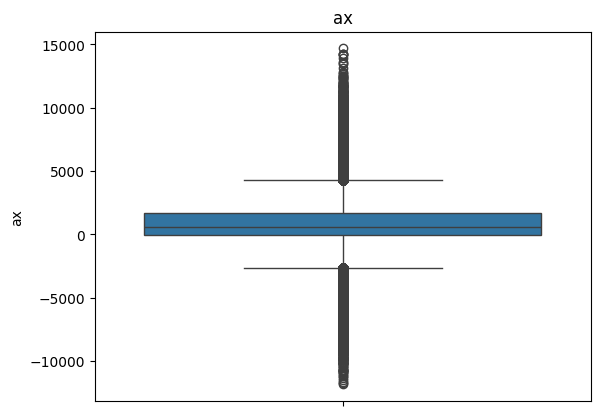

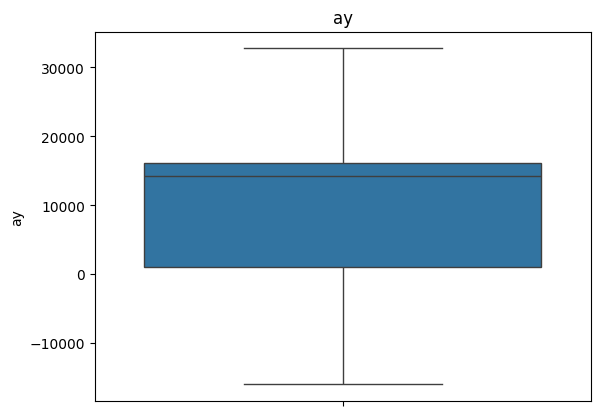

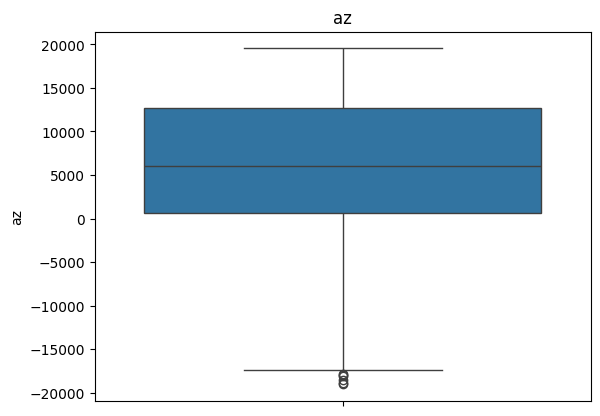

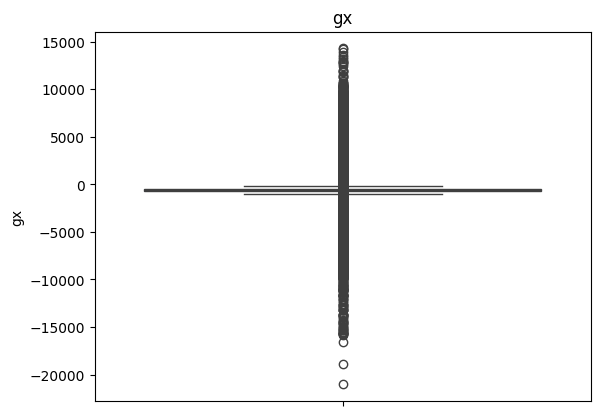

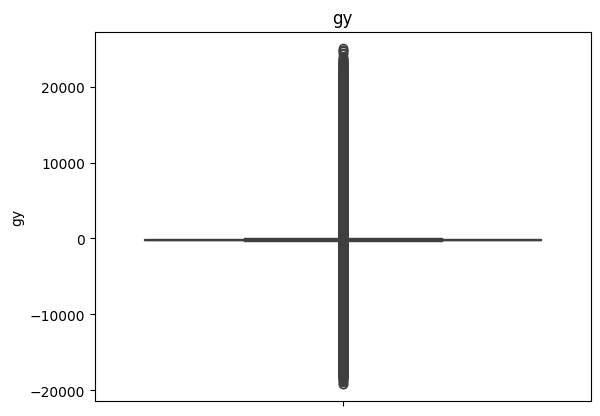

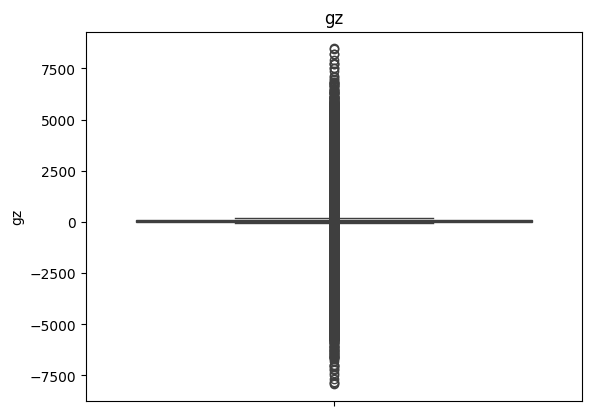

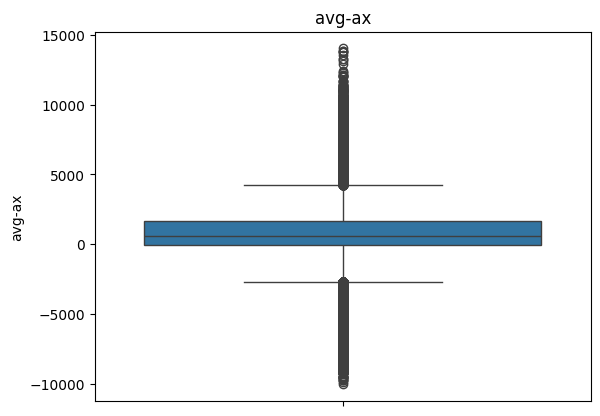

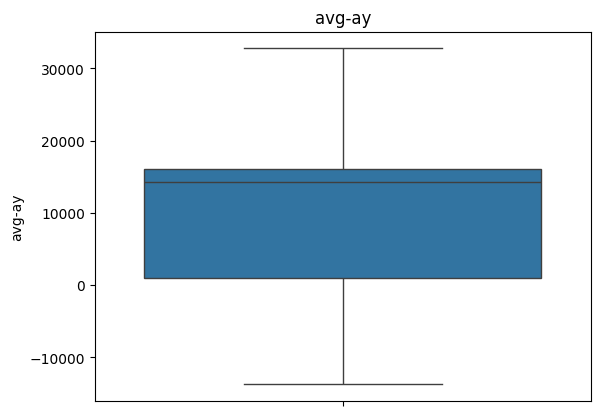

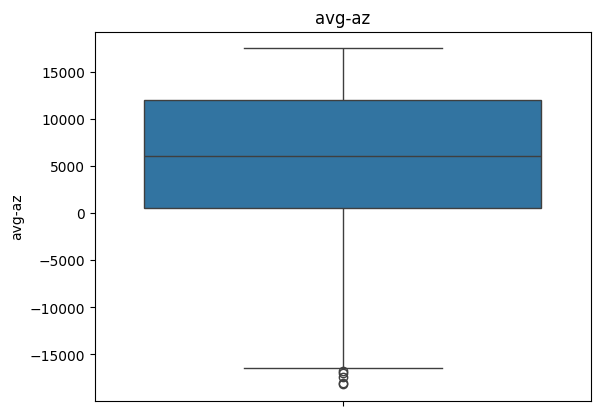

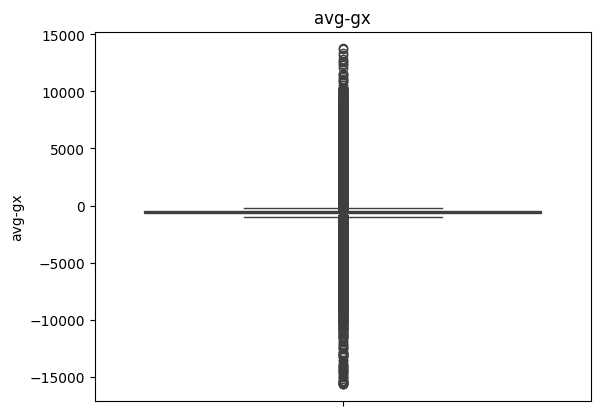

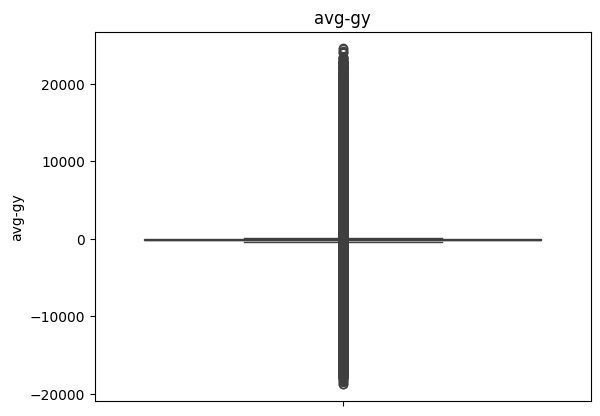

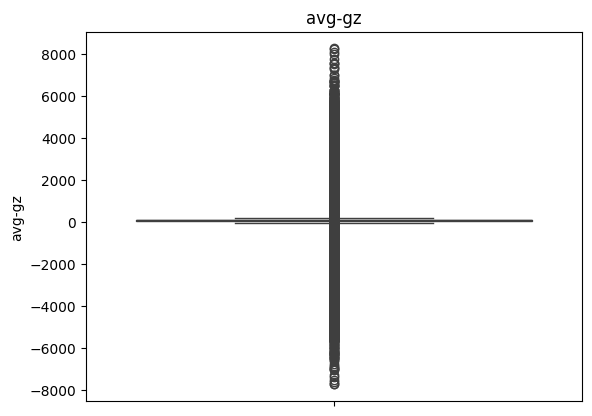

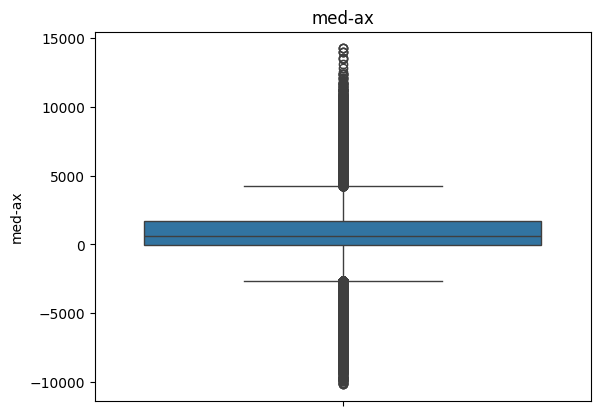

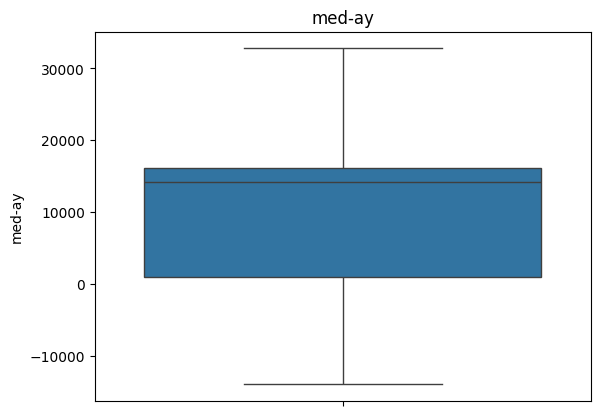

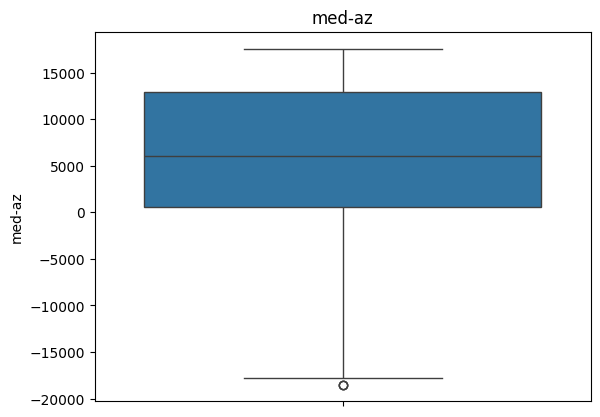

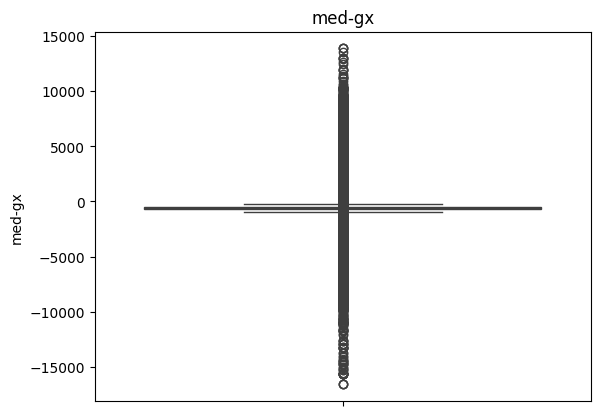

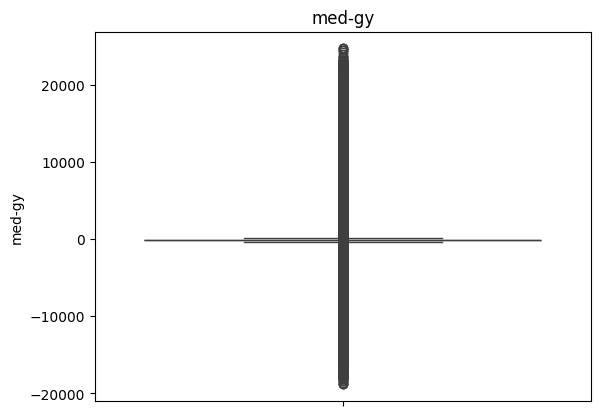

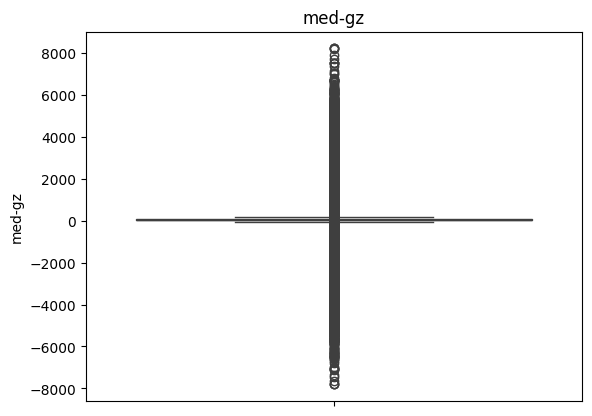

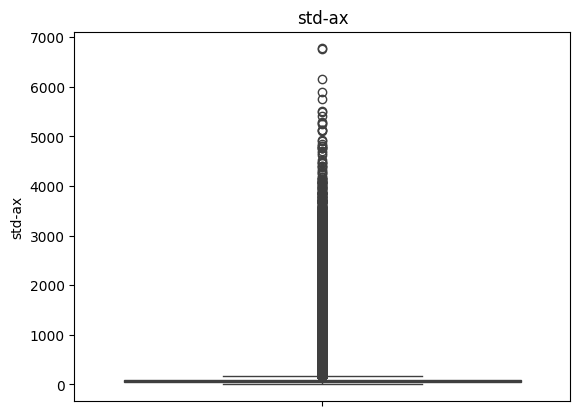

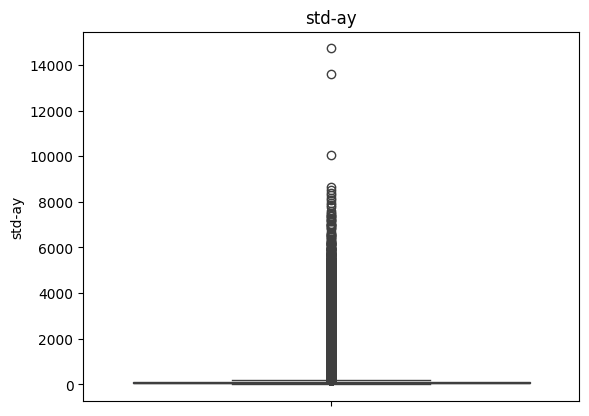

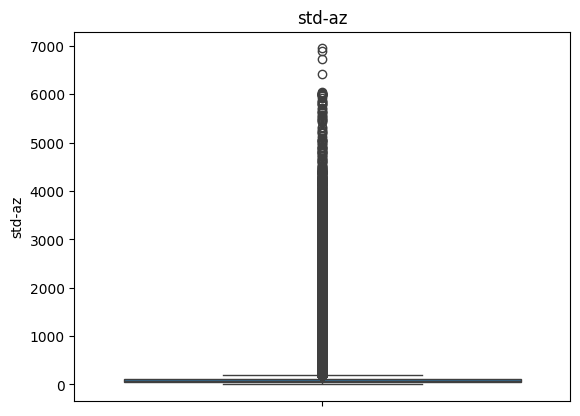

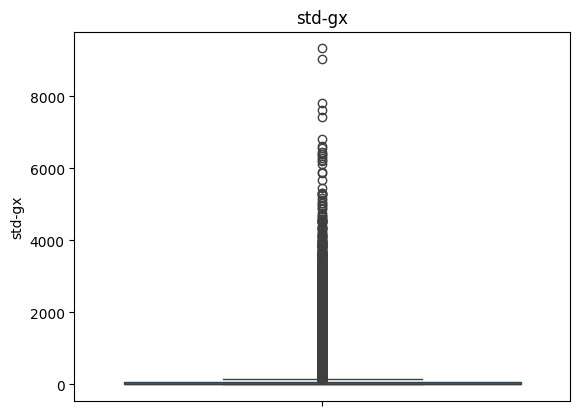

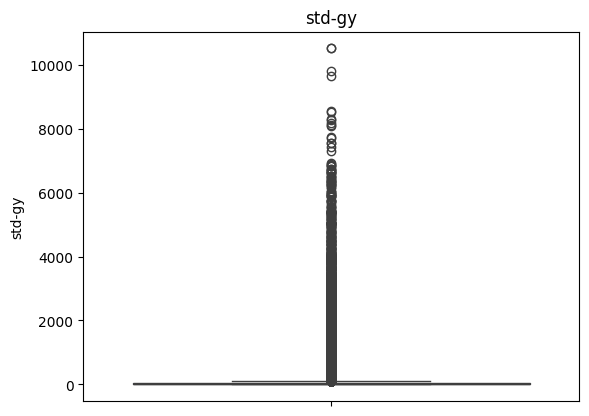

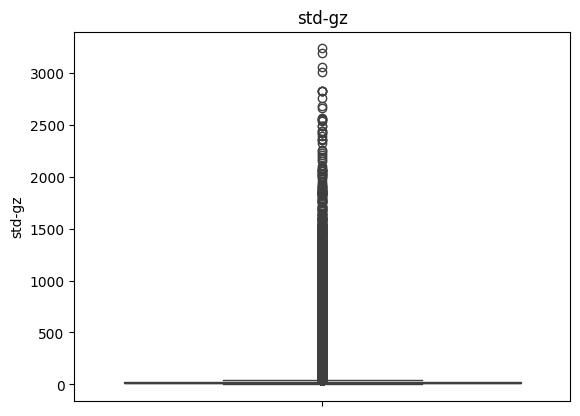

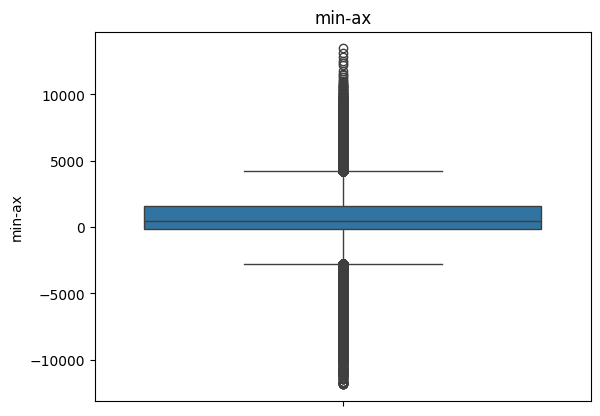

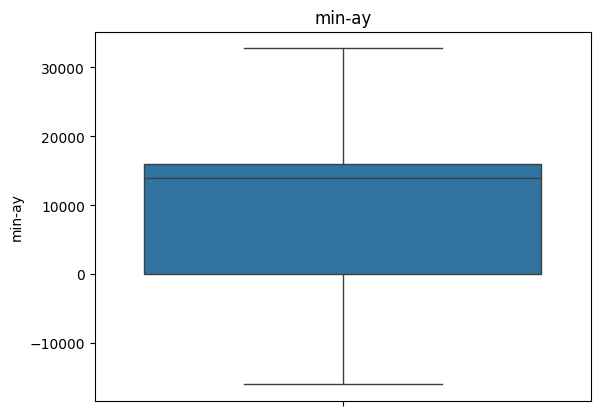

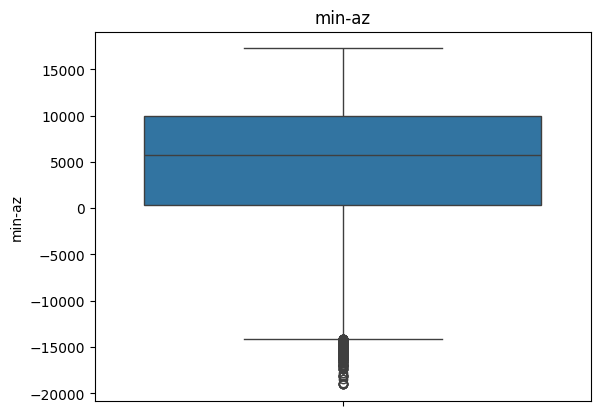

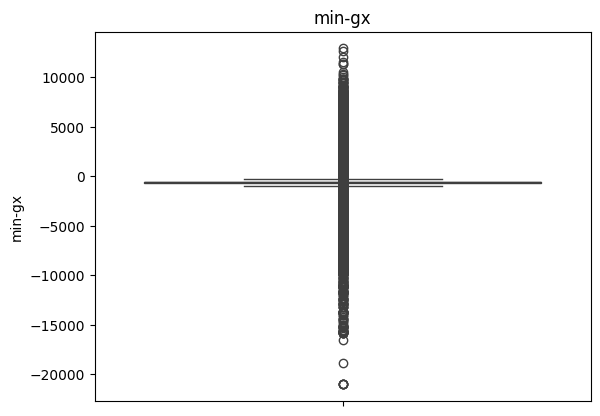

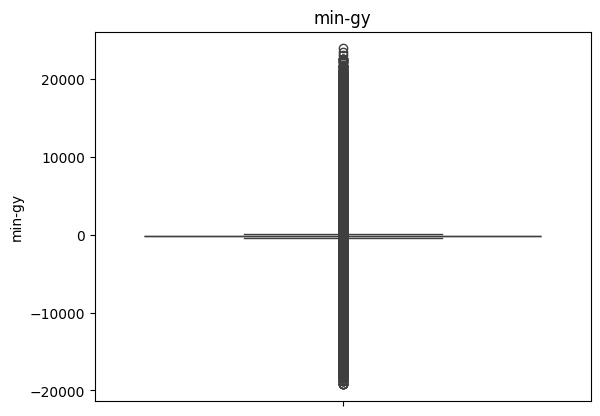

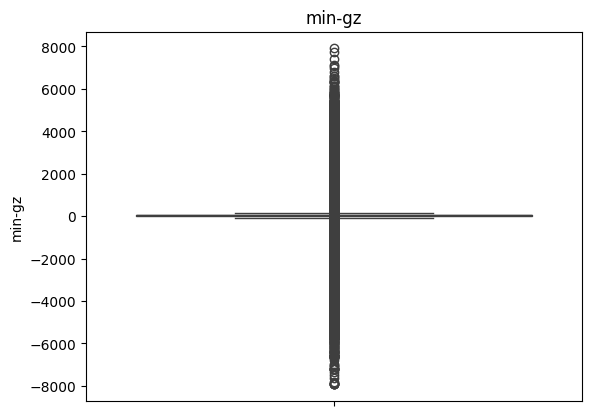

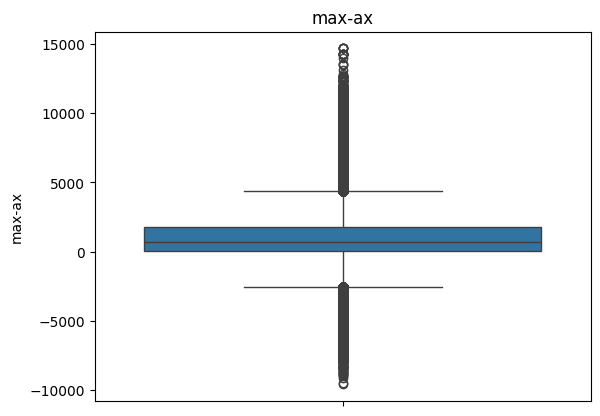

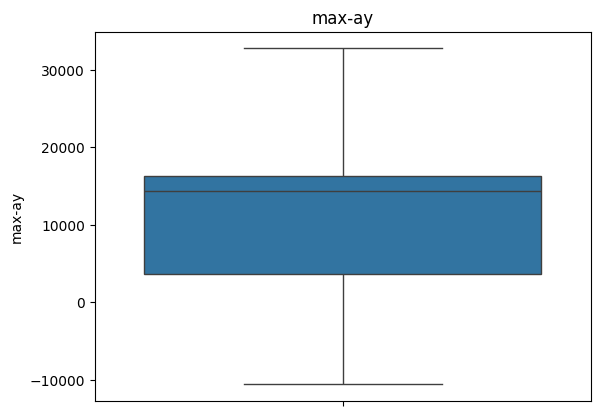

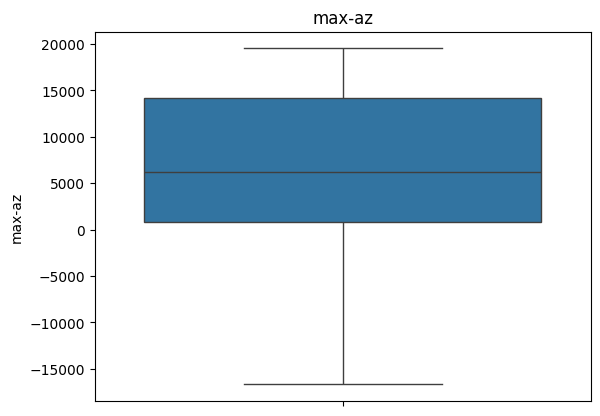

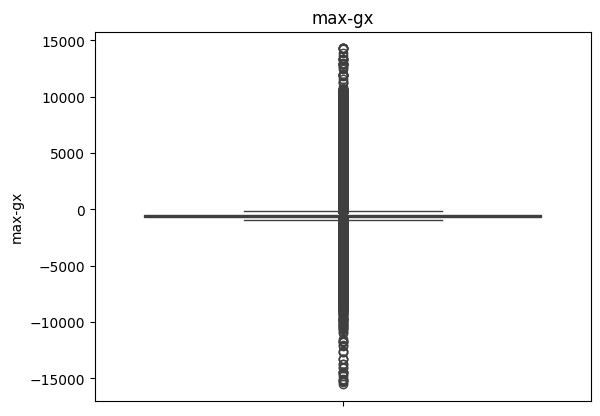

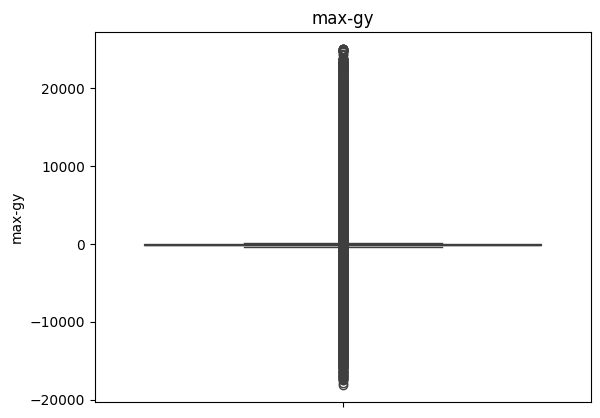

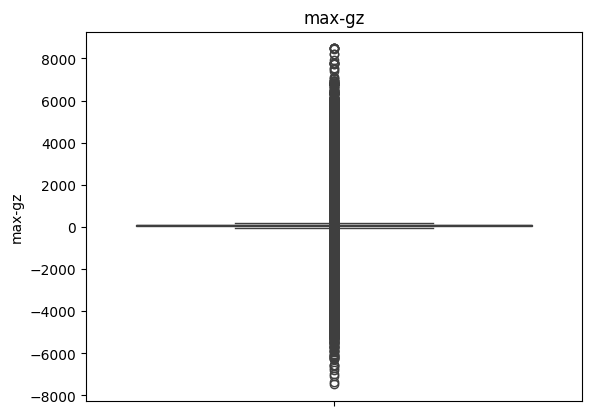

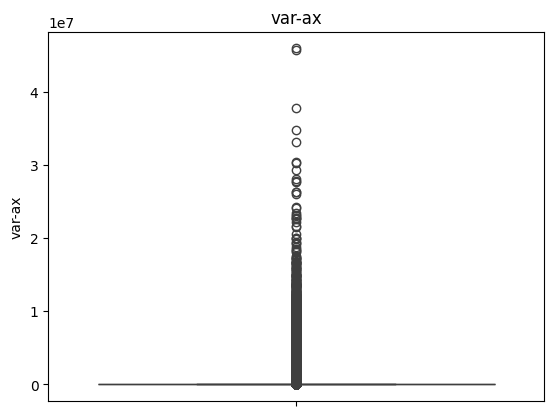

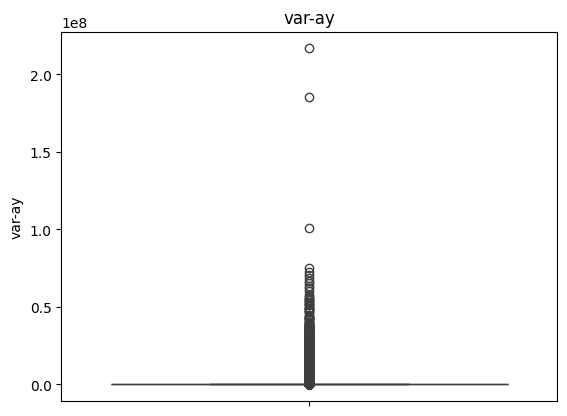

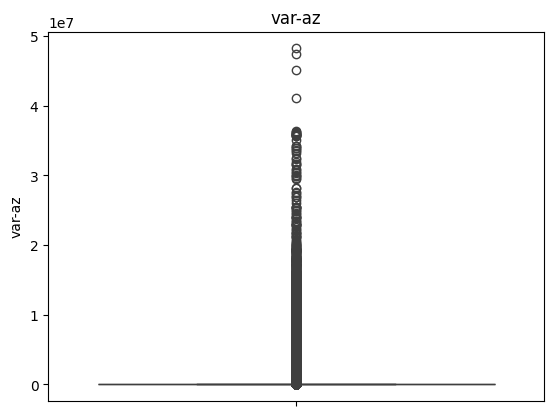

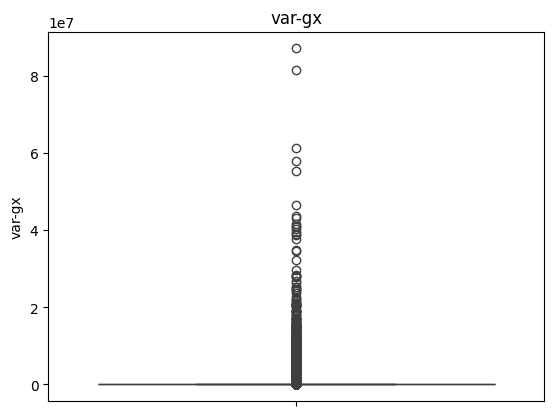

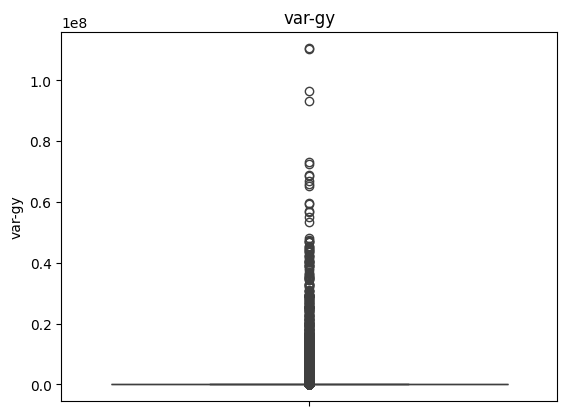

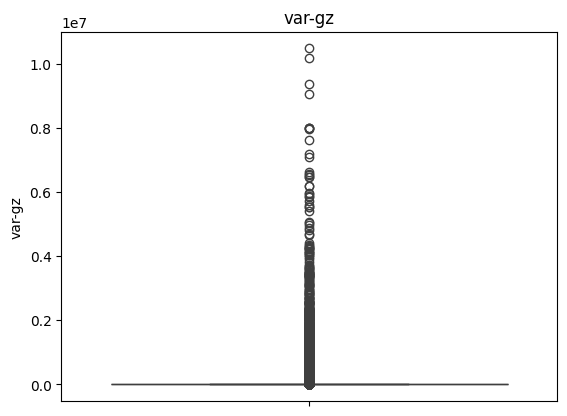

In [ ]:
for i in dataframe.columns[:-1]:
  sns.boxplot(dataframe[i])
  plt.title(i)
  plt.show()

In [ ]:
def remove_outliers(dataframe, columns):
  for col in columns:
    Q1 = dataframe[col].quantile(0.01)
    Q3 = dataframe[col].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

  return dataframe

In [ ]:
col = dataframe.columns[:-1]
cleaned_dataframe = remove_outliers(dataframe, col)
cleaned_dataframe

,ax,ay,az,gx,gy,gz,avg-ax,avg-ay,avg-az,avg-gx,...,max-gx,max-gy,max-gz,var-ax,var-ay,var-az,var-gx,var-gy,var-gz,label
0,272,13524,7848,-679,-183,-61,147.2,13523.2,8056.0,-601.4,...,-500,-106,-14,5986.56,3157.76,20883.20,3789.04,611.76,384.24,0
1,408,13384,7884,-707,-178,-38,219.2,13486.4,8021.6,-642.8,...,-569,-133,-14,12437.76,5277.44,25616.64,2248.96,467.76,324.96,0
2,404,13380,7864,-748,-168,-57,280.8,13467.2,7934.4,-678.6,...,-627,-133,-14,12437.76,7151.36,7479.04,2091.44,426.00,277.36,0
3,412,13292,7816,-714,-146,-19,325.6,13405.6,7894.4,-696.0,...,-632,-133,-14,12151.04,5968.64,7351.04,1506.80,365.84,365.36,0
4,292,13368,7892,-752,-129,-27,357.6,13389.6,7860.8,-720.0,...,-679,-129,-19,3856.64,5635.84,738.56,738.80,414.16,268.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599994,2300,792,15244,-694,-187,87,2271.2,769.6,15202.4,-699.2,...,-673,-173,110,1416.96,1418.24,3063.04,250.56,128.64,130.56,3
599995,2304,736,15196,-666,-191,90,2279.2,756.8,15199.2,-691.0,...,-666,-173,110,1557.76,1295.36,3042.56,391.60,114.24,104.64,3
599996,2348,724,15180,-689,-192,81,2308.0,744.8,15192.8,-684.6,...,-666,-187,110,544.00,1218.56,3042.56,171.44,38.24,117.84,3
599997,2220,684,15220,-695,-208,96,2289.6,742.4,15187.2,-689.0,...,-666,-187,96,1751.04,1475.84,2549.76,146.80,52.40,34.96,3


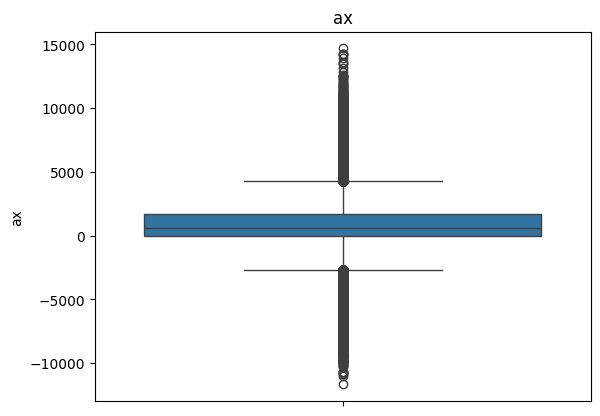

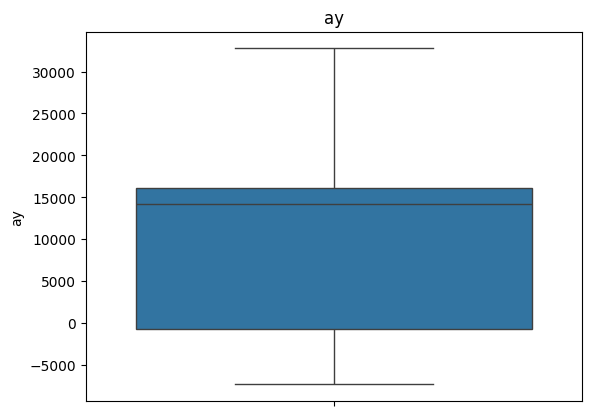

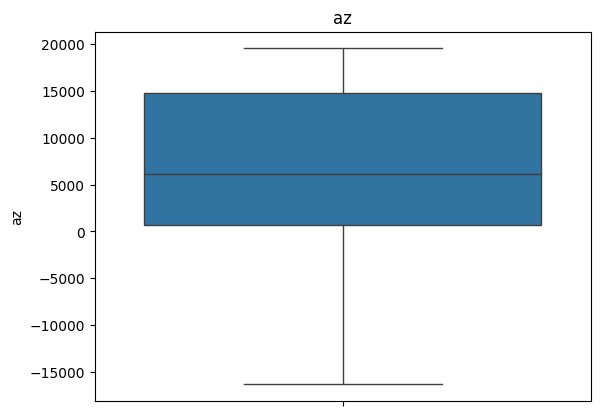

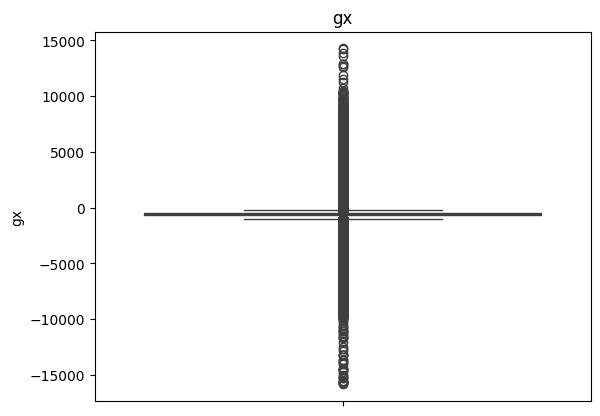

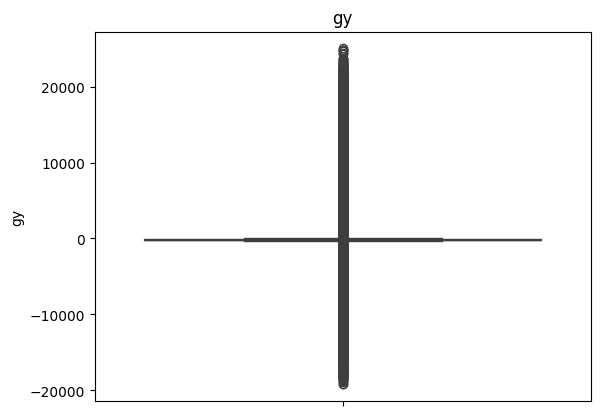

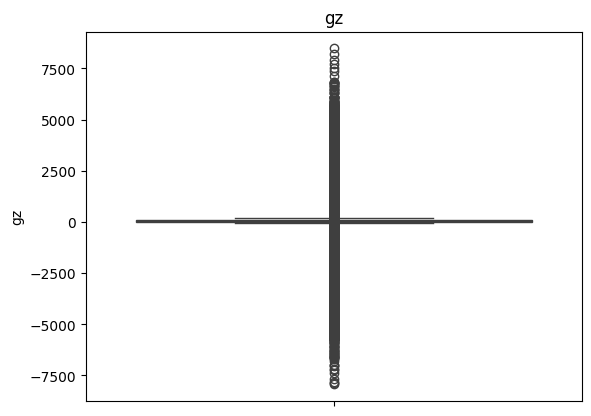

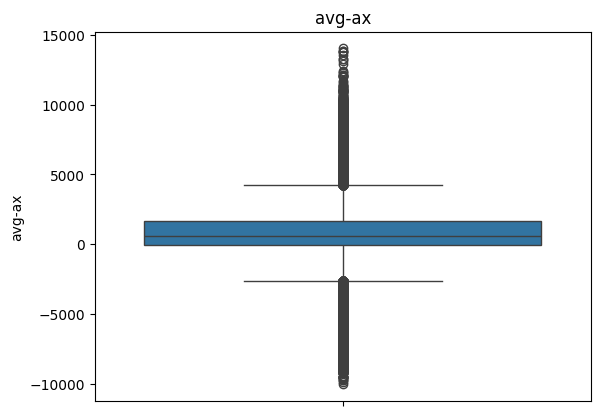

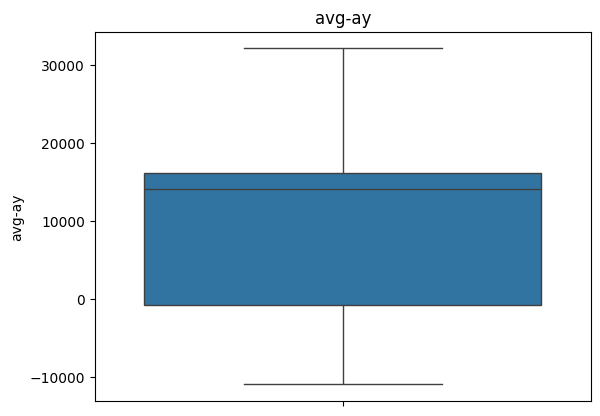

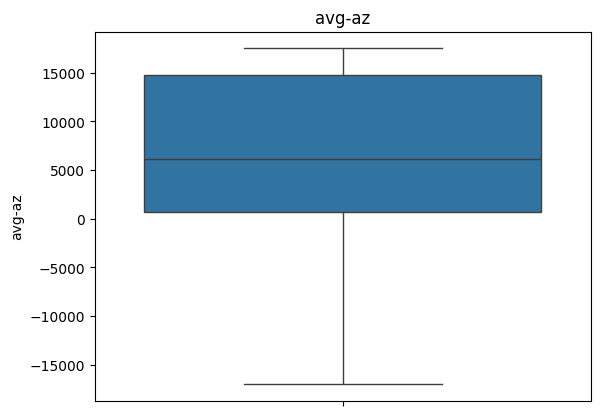

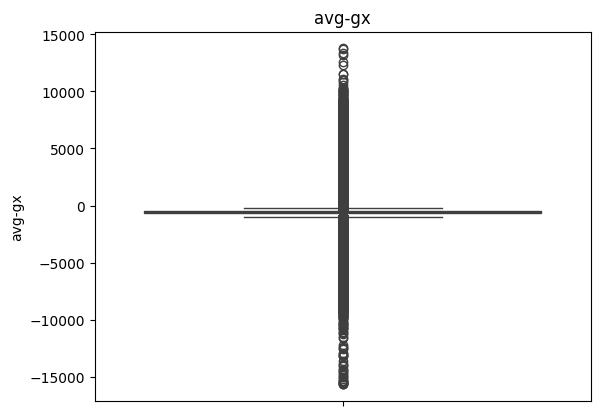

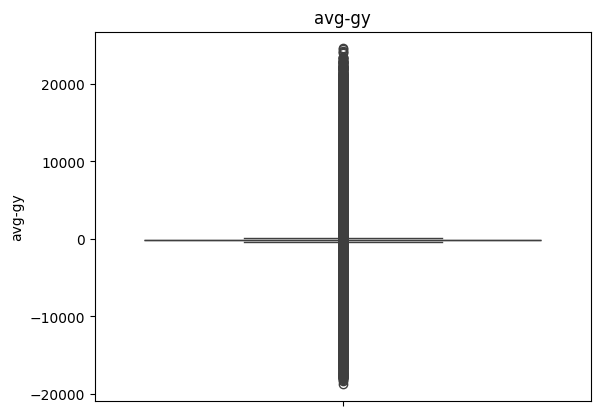

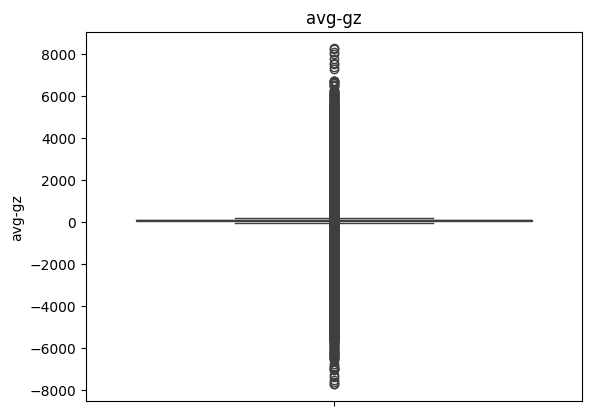

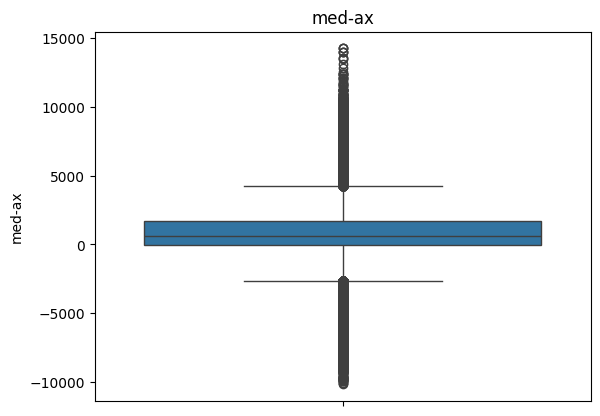

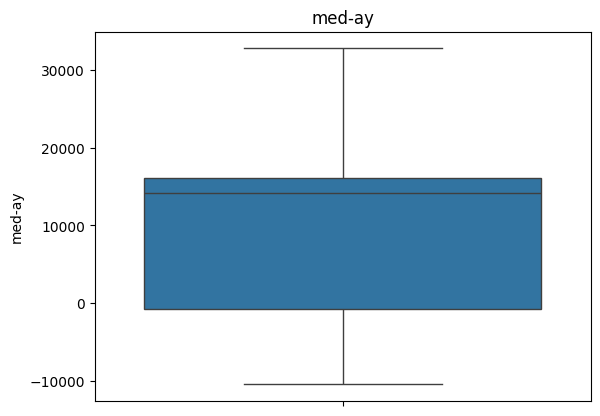

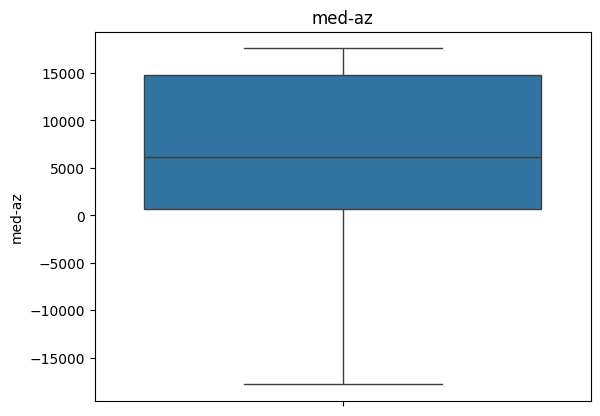

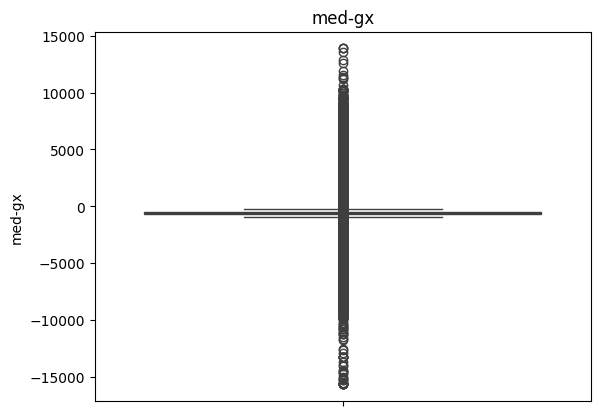

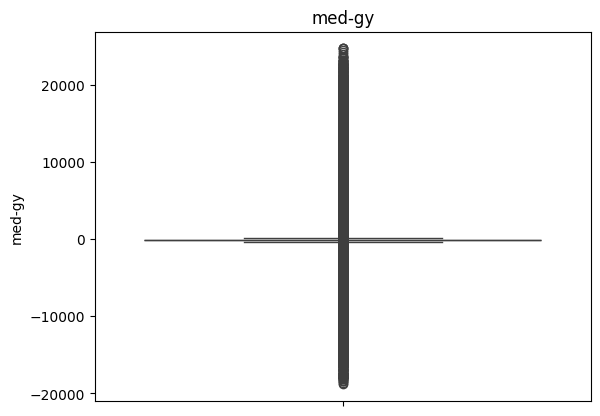

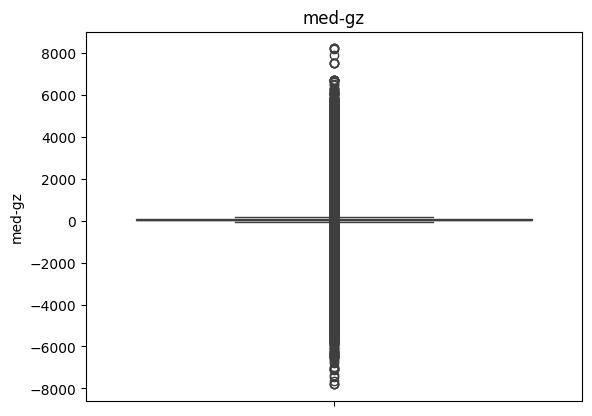

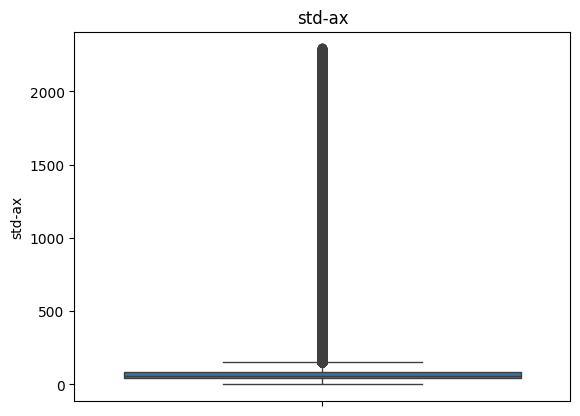

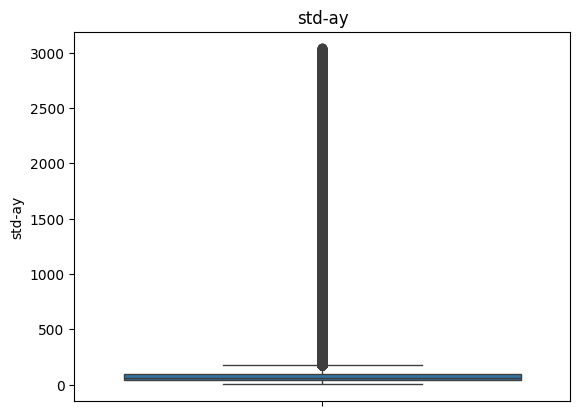

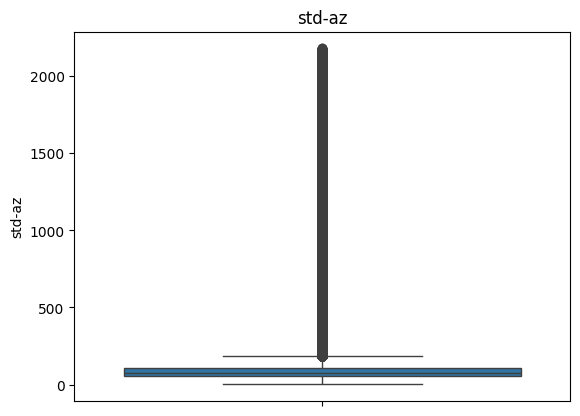

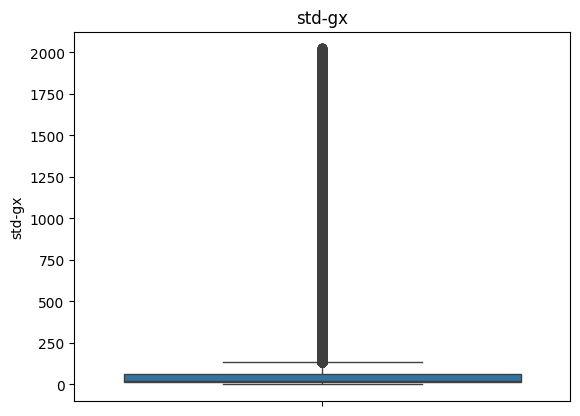

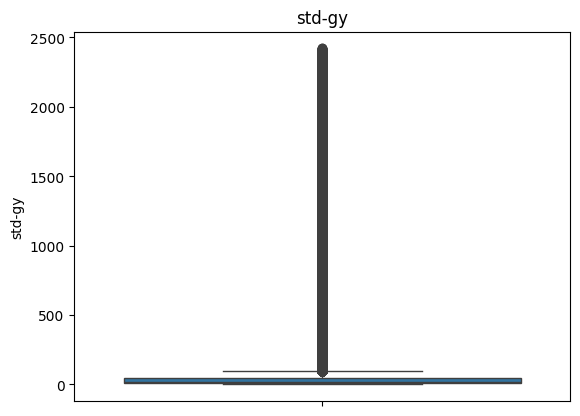

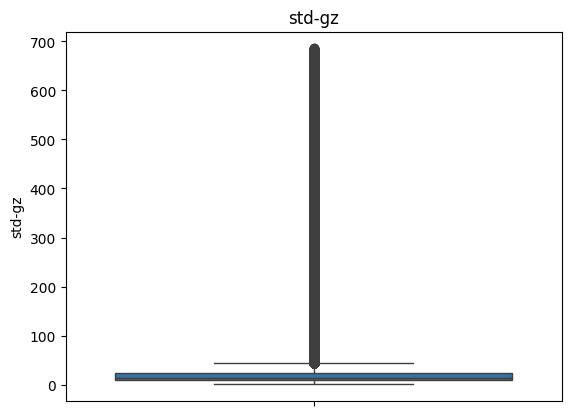

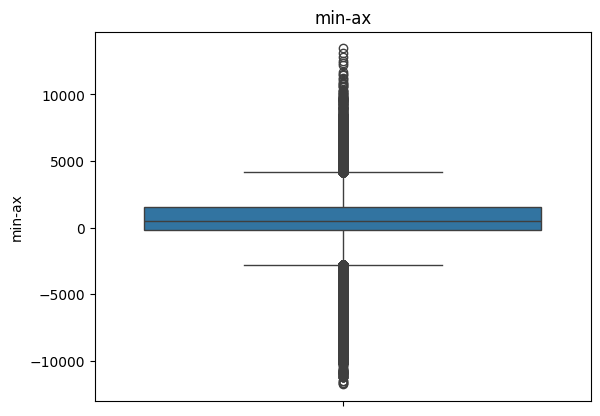

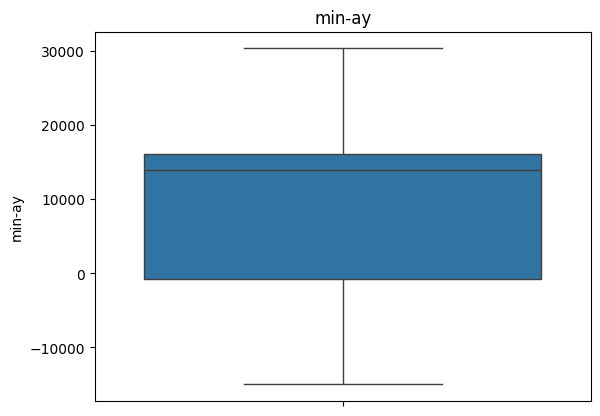

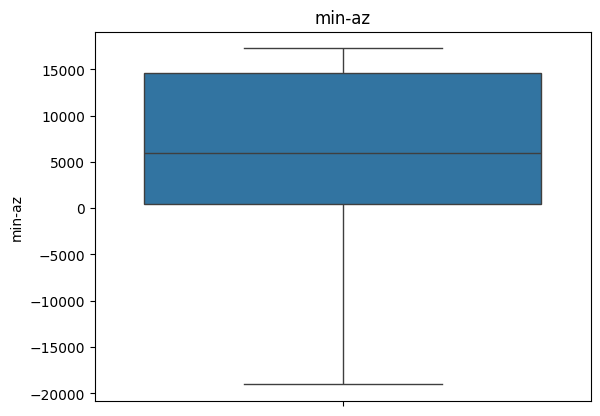

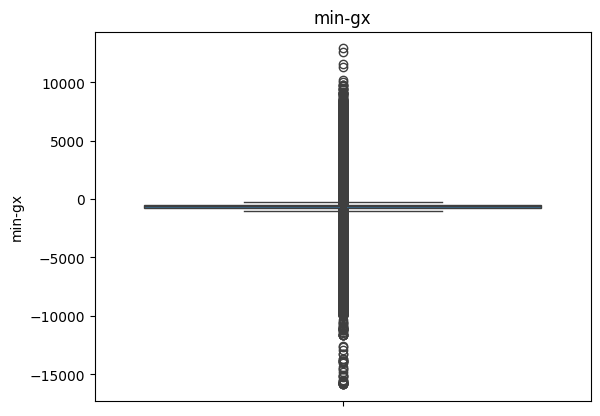

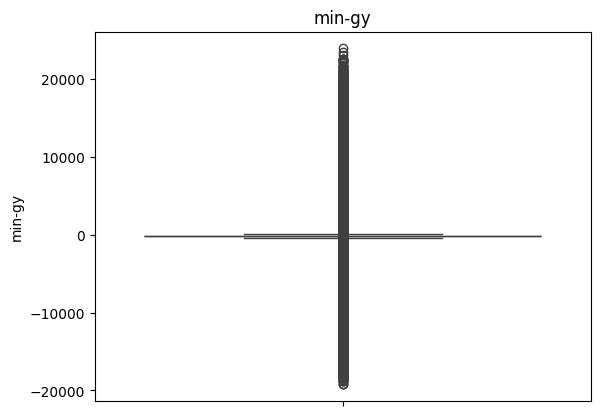

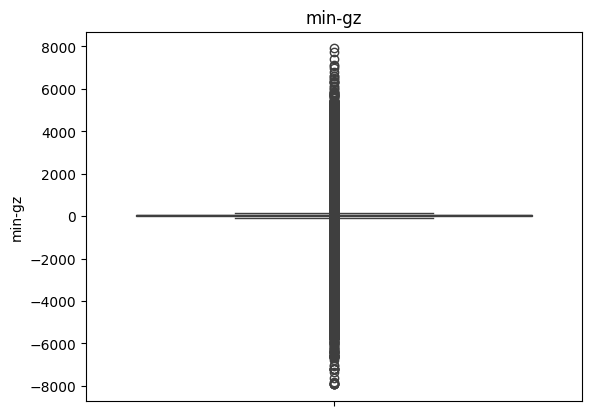

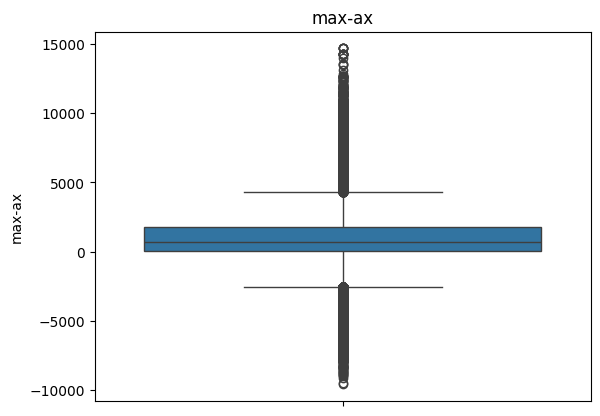

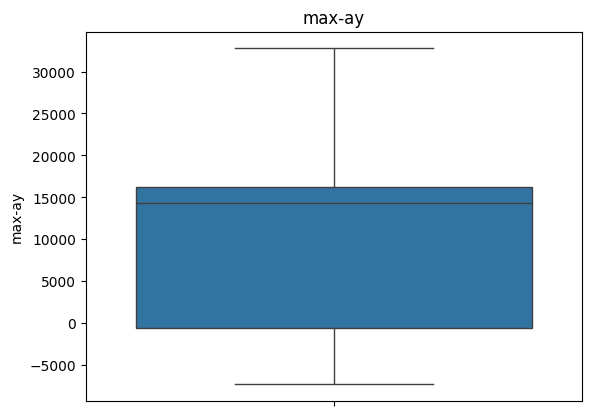

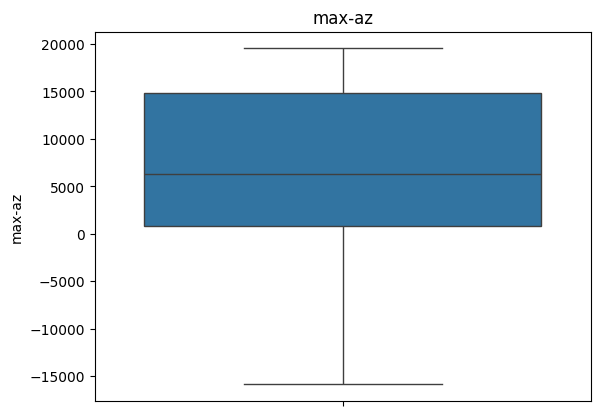

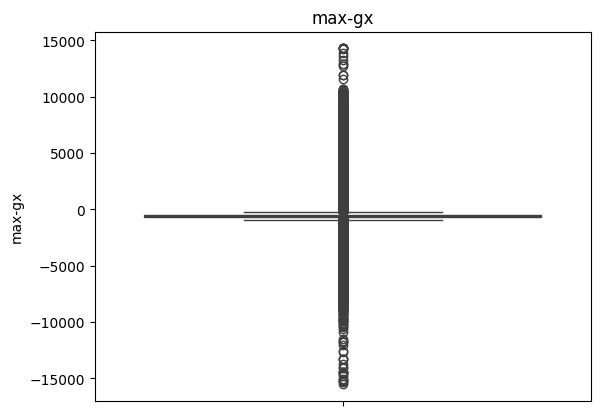

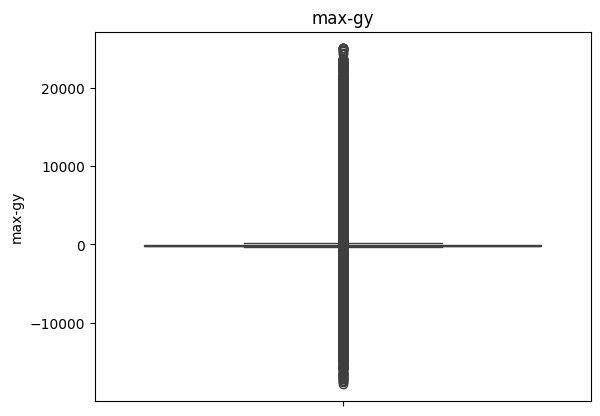

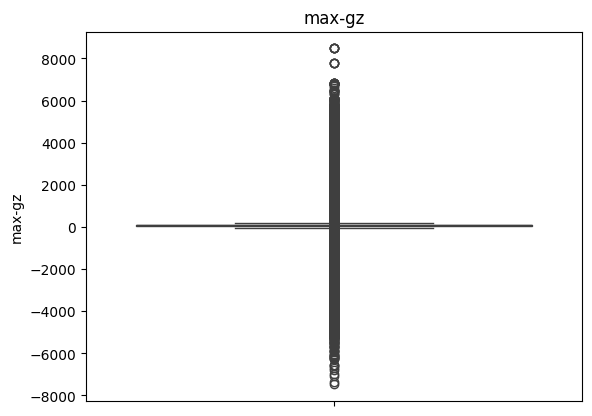

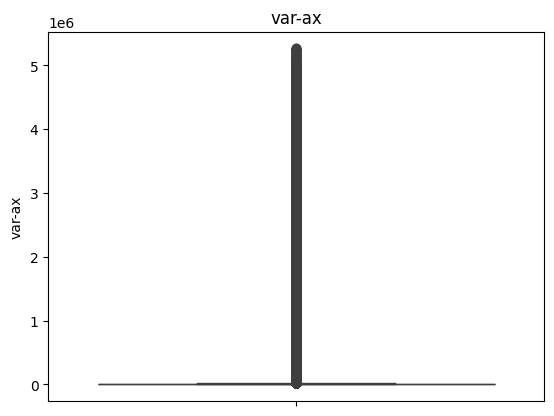

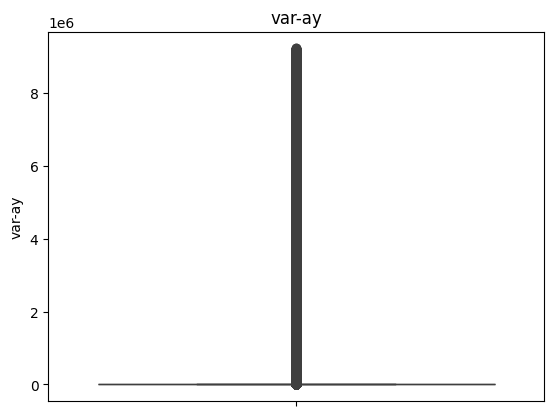

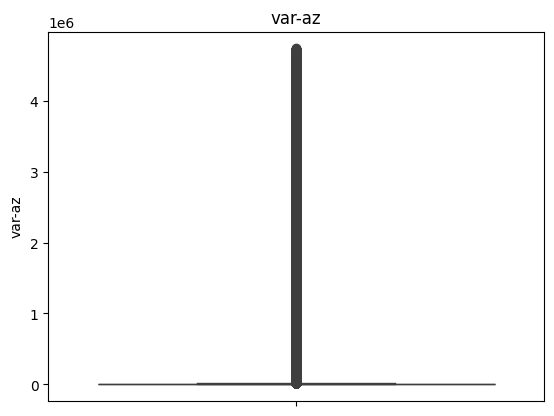

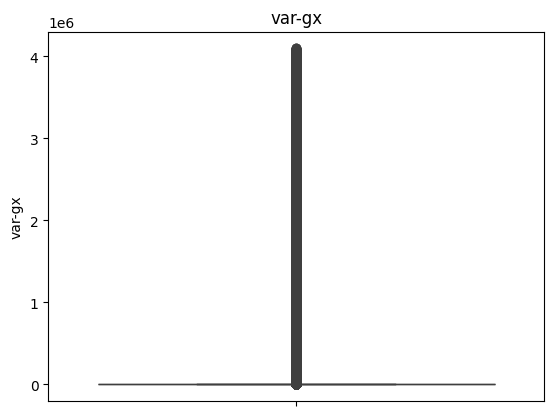

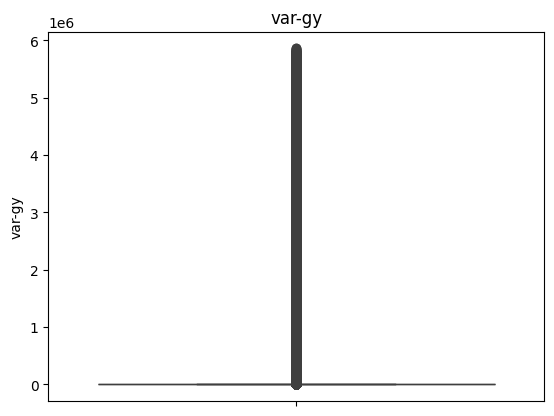

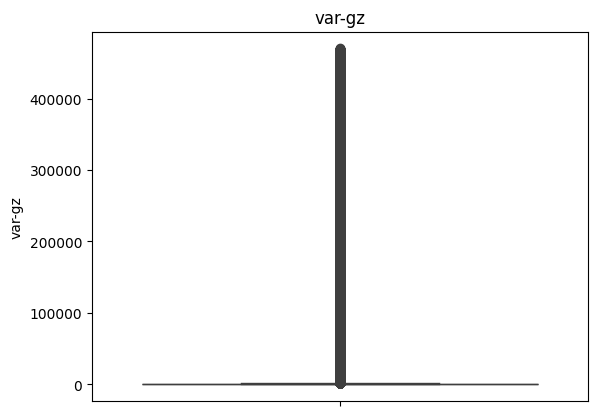

In [ ]:
for i in dataframe.columns[:-1]:
  sns.boxplot(cleaned_dataframe[i])
  plt.title(i)
  plt.show()

In [ ]:
cleaned_dataframe.shape

(593429, 43)

#**Data Visualization(EDA)**

In [ ]:
#unique number of values in each column
for i in cleaned_dataframe.columns:
  print(i + ' ',cleaned_dataframe[i].nunique())

ax  4445
ay  6201
az  5864
gx  13595
gy  23669
gz  8905
avg-ax  17335
avg-ay  22999
avg-az  24633
avg-gx  46407
avg-gy  68302
avg-gz  32242
med-ax  4199
med-ay  5768
med-az  5647
med-gx  12894
med-gy  22555
med-gz  8568
std-ax  91670
std-ay  93953
std-az  74538
std-gx  159924
std-gy  149486
std-gz  104592
min-ax  4158
min-ay  5455
min-az  5670
min-gx  12657
min-gy  22666
min-gz  8533
max-ax  4173
max-ay  5849
max-az  5529
max-gx  12946
max-gy  22346
max-gz  8489
var-ax  91670
var-ay  93953
var-az  74538
var-gx  159924
var-gy  149486
var-gz  104592
label  4


In [ ]:
#barplot
tempdf = cleaned_dataframe['label'].value_counts().reset_index()
fig = px.bar(tempdf, x='label', y='count', color='label', title='Value Count of Target Class')
fig.show()

In [ ]:
tempdf = cleaned_dataframe[['ax', 'ay', 'az', 'label']].groupby(['label']).mean().reset_index()
fig = px.line(tempdf,x='label', y=['ax', 'ay', 'az'])
fig.show()

In [ ]:
tempdf = cleaned_dataframe[['avg-ax', 'avg-ay', 'avg-az', 'label']].groupby(['label']).mean().reset_index()
fig = px.bar(tempdf,x='label', y=['avg-ax', 'avg-ay', 'avg-az'], barmode="group")
fig.show()

#Data Preprocessing

In [ ]:
X = cleaned_dataframe.drop('label', axis='columns')
y = cleaned_dataframe['label']

In [ ]:
#applying minmax scaler for data normalization
scaler = MinMaxScaler()
X_s = scaler.fit_transform(X)
X_s = pd.DataFrame(X_s, columns=X.columns)

In [ ]:
X_s.head()

,ax,ay,az,gx,gy,gz,avg-ax,avg-ay,avg-az,avg-gx,...,max-az,max-gx,max-gy,max-gz,var-ax,var-ay,var-az,var-gx,var-gy,var-gz
0,0.453263,0.519873,0.674139,0.503467,0.430050,0.479559,0.423285,0.568124,0.726377,0.511747,...,0.682706,0.503892,0.413733,0.467632,0.001137,0.000342,0.004405,0.000925,0.000104,0.000816
1,0.458422,0.516380,0.675142,0.502538,0.430163,0.480960,0.426275,0.567268,0.725381,0.510340,...,0.682706,0.501577,0.413103,0.467632,0.002362,0.000572,0.005404,0.000549,0.000080,0.000690
2,0.458270,0.516280,0.674585,0.501178,0.430389,0.479803,0.428832,0.566822,0.722856,0.509124,...,0.675929,0.499631,0.413103,0.467632,0.002362,0.000775,0.001577,0.000510,0.000073,0.000589
3,0.458574,0.514085,0.673246,0.502306,0.430886,0.482118,0.430693,0.565390,0.721697,0.508533,...,0.675929,0.499463,0.413103,0.467632,0.002308,0.000647,0.001550,0.000368,0.000062,0.000776
4,0.454021,0.515981,0.675365,0.501045,0.431270,0.481630,0.432021,0.565018,0.720724,0.507718,...,0.671185,0.497886,0.413197,0.467318,0.000732,0.000610,0.000154,0.000180,0.000071,0.000571


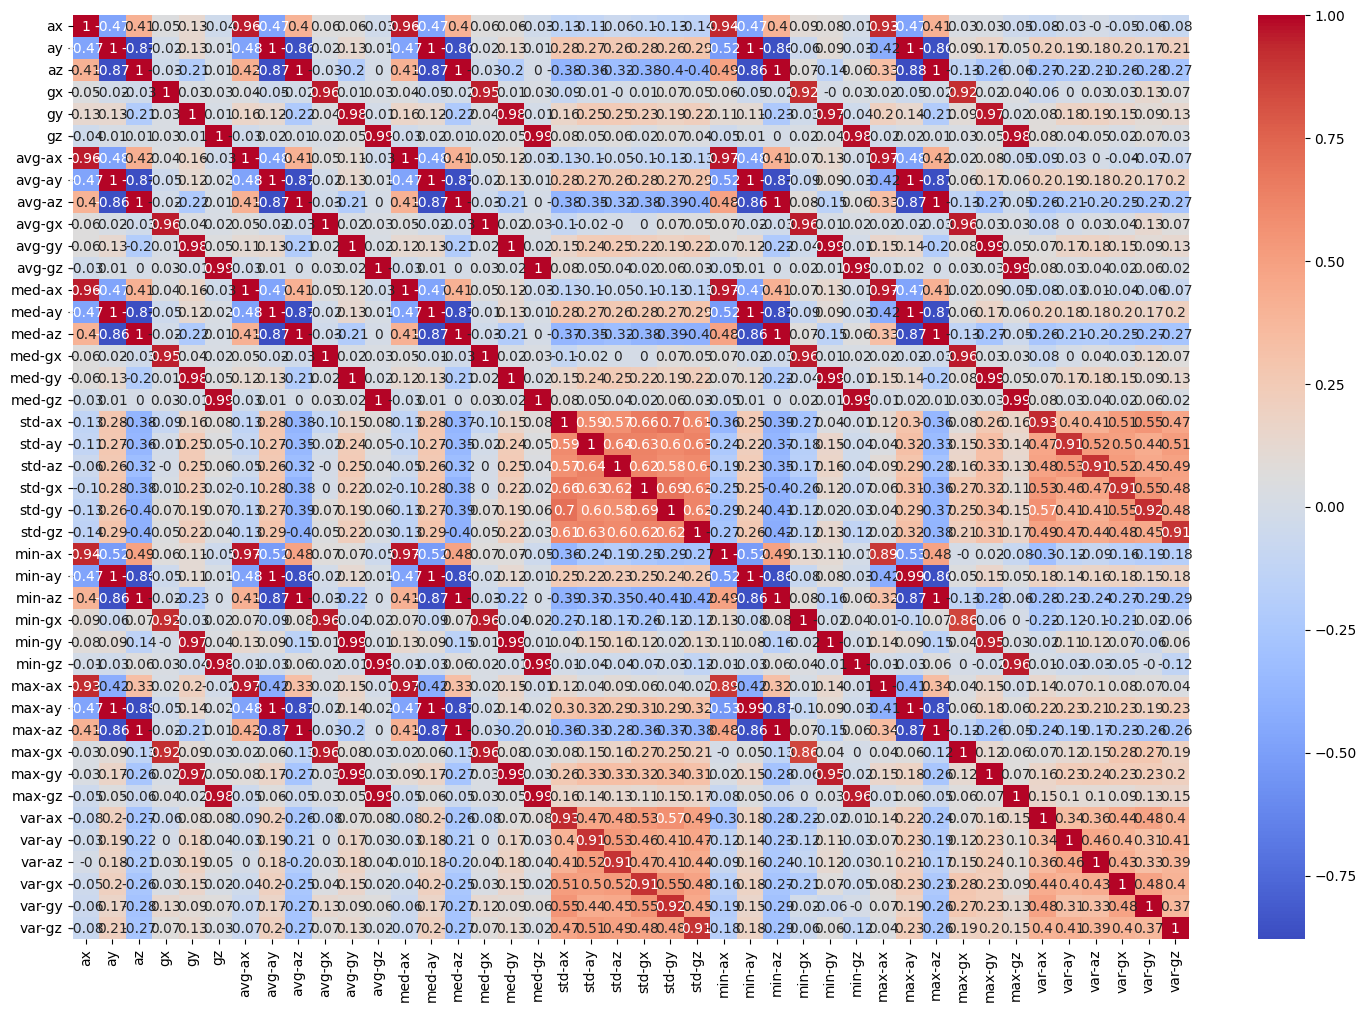

In [ ]:
correlation = X_s.corr().round(2)
plt.figure(figsize = (18,12))
sns.heatmap(correlation, annot = True, cmap='coolwarm')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_s, y, test_size=0.2, stratify=y)

In [ ]:
X_train.shape

(474743, 42)

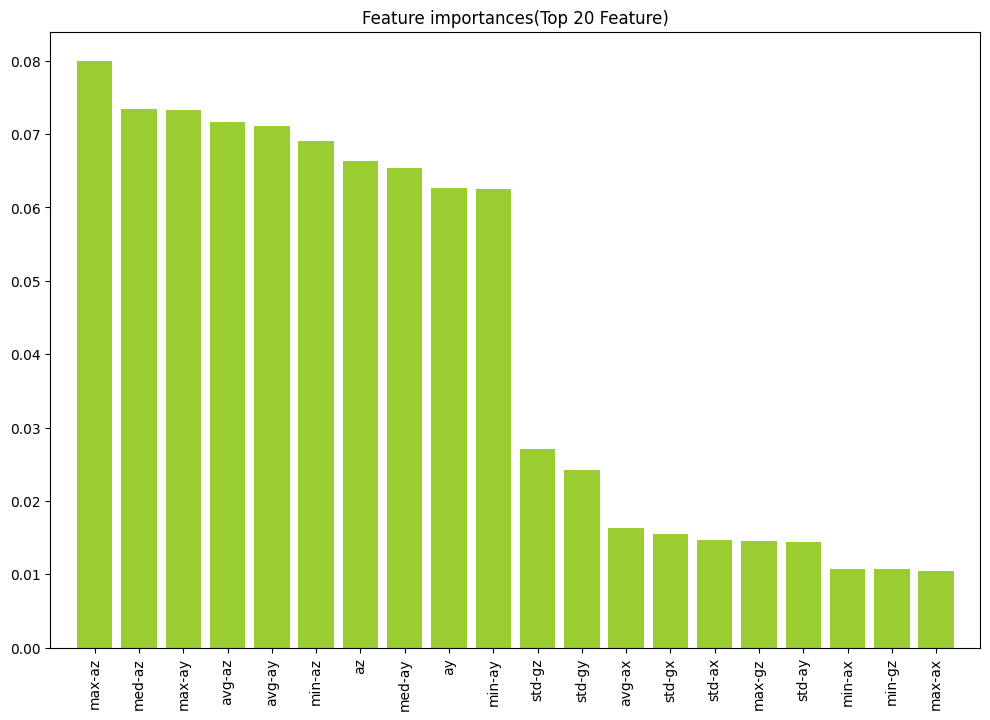

In [ ]:
#model feature importance(finding impact of feature variable on target)
fearture_name = X_train.columns.values
model = ensemble.ExtraTreesClassifier()
model.fit(X_train,y_train)
#plot imp
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]
plt.figure(figsize=(12,8))
plt.title("Feature importances(Top 20 Feature)")
plt.bar(range(len(indices)), importance[indices], color="yellowgreen")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
impfeatlist = fearture_name[indices].tolist()
print(impfeatlist)

['max-az', 'med-az', 'max-ay', 'avg-az', 'avg-ay', 'min-az', 'az', 'med-ay', 'ay', 'min-ay', 'std-gz', 'std-gy', 'avg-ax', 'std-gx', 'std-ax', 'max-gz', 'std-ay', 'min-ax', 'min-gz', 'max-ax']


#**Machine Learning Models**

#SVM Classifier

In [ ]:
svcmodel = SVC(C=1.0, kernel='rbf', degree=3, max_iter=20)
svcmodel.fit(X_train[impfeatlist],y_train)
y_pred = svcmodel.predict(X_test[impfeatlist])

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.6746204270090828


Text(50.722222222222214, 0.5, 'Actual Label')

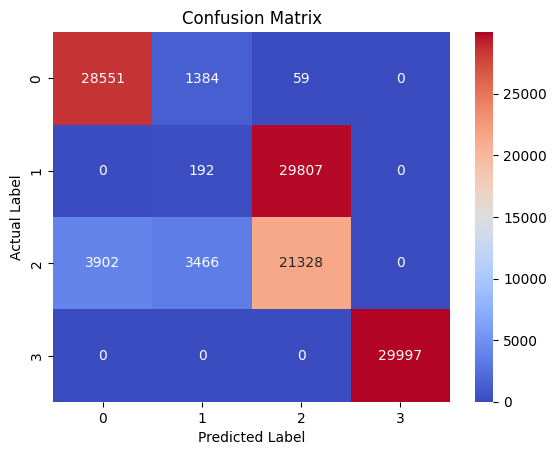

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='g', cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     29994
           1       0.04      0.01      0.01     29999
           2       0.42      0.74      0.53     28696
           3       1.00      1.00      1.00     29997

    accuracy                           0.67    118686
   macro avg       0.58      0.68      0.61    118686
weighted avg       0.59      0.67      0.62    118686



#Decision Tree Classifier

In [ ]:
dtcmodel = DecisionTreeClassifier(max_depth=2)
dtcmodel.fit(X_train[impfeatlist],y_train)
y_pred = dtcmodel.predict(X_test[impfeatlist])

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.7552870599733751


Text(50.722222222222214, 0.5, 'Actual Label')

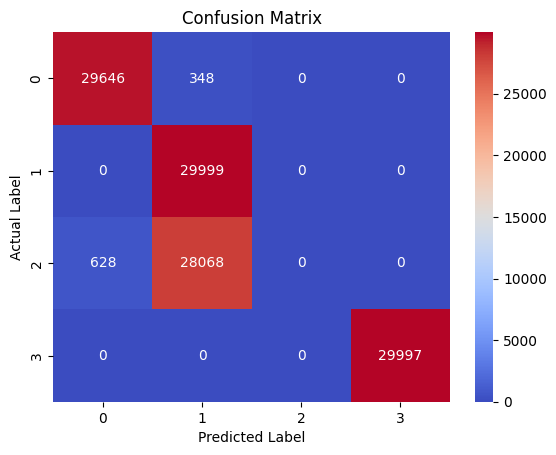

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='g', cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29994
           1       0.51      1.00      0.68     29999
           2       0.00      0.00      0.00     28696
           3       1.00      1.00      1.00     29997

    accuracy                           0.76    118686
   macro avg       0.62      0.75      0.67    118686
weighted avg       0.63      0.76      0.67    118686



#Random Forest Classifier

In [ ]:
rfcmodel = RandomForestClassifier(n_estimators=25, max_depth=2)
rfcmodel.fit(X_train[impfeatlist],y_train)
y_pred = rfcmodel.predict(X_test[impfeatlist])

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.9020440490032523


Text(50.722222222222214, 0.5, 'Actual Label')

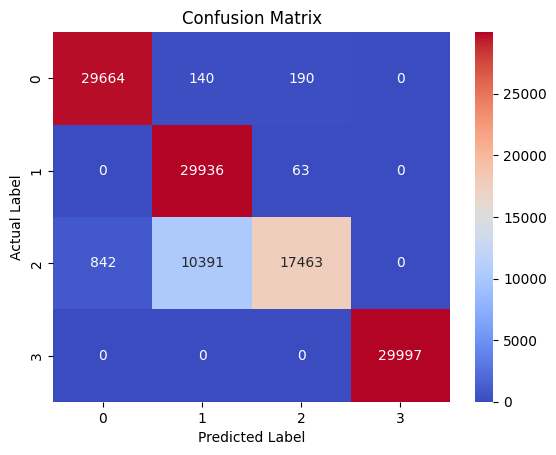

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='g', cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     29994
           1       0.74      1.00      0.85     29999
           2       0.99      0.61      0.75     28696
           3       1.00      1.00      1.00     29997

    accuracy                           0.90    118686
   macro avg       0.92      0.90      0.90    118686
weighted avg       0.92      0.90      0.90    118686



#AdaBoost Classifier

In [ ]:
adbcmodel = AdaBoostClassifier(n_estimators=5)
adbcmodel.fit(X_train[impfeatlist],y_train)
y_pred = adbcmodel.predict(X_test[impfeatlist])

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.7951569688084525


Text(50.722222222222214, 0.5, 'Actual Label')

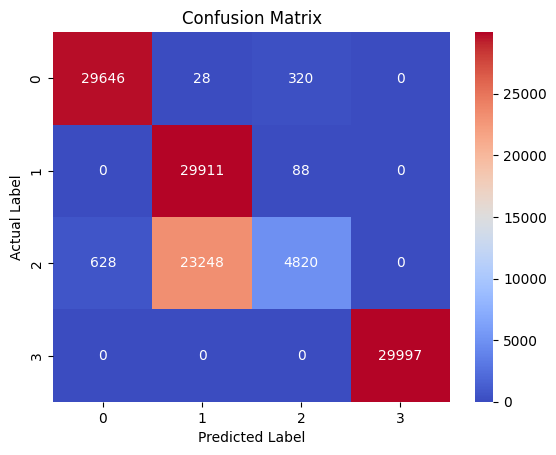

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='g', cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29994
           1       0.56      1.00      0.72     29999
           2       0.92      0.17      0.28     28696
           3       1.00      1.00      1.00     29997

    accuracy                           0.80    118686
   macro avg       0.87      0.79      0.75    118686
weighted avg       0.87      0.80      0.75    118686



#Stacking Classifier

In [ ]:
estimators = [('rfc', RandomForestClassifier(n_estimators=8, max_depth=4)), ('dtc', DecisionTreeClassifier(max_depth=2))]
hybridmodel = StackingClassifier(estimators=estimators,final_estimator=AdaBoostClassifier(n_estimators=6))
hybridmodel.fit(X_train[impfeatlist],y_train)
y_pred = hybridmodel.predict(X_test[impfeatlist])

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.9922905818714929


Text(50.722222222222214, 0.5, 'Actual Label')

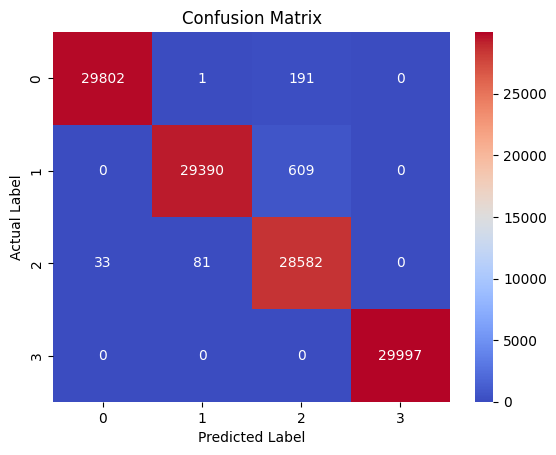

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,  fmt='g', cmap="coolwarm")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     29994
           1       1.00      0.98      0.99     29999
           2       0.97      1.00      0.98     28696
           3       1.00      1.00      1.00     29997

    accuracy                           0.99    118686
   macro avg       0.99      0.99      0.99    118686
weighted avg       0.99      0.99      0.99    118686

